# Expressive speech synthesis

Text to Speech systems built using Neural Networks are proved being efifcient and robust, morover they can be scaled to multiple voices, but we still want to bring next level of naturalness of synthesis. As well as add controls to change intonation, highlight important words, transfer style of speeking of well know public speakers.

# Prosody
In linguistics, prosody is concerned with those elements of speech that are not individual phonetic segments but are properties of syllables and larger units of speech, including linguistic functions such as __intonation, tone, stress, and rhythm__

Prosody conveys additional layer of information in our speech, it reflects mood of a speaker, encodes sarcasm. it also carries cultural context, and particular style of speeking prominent in one culture but absent in another.

Hard part of this task is to __get a suitable representation__ of the style from a reference utterance which is dissentangled from speaker identity and linguistic content.

<img src="assets/expressive_tts.png" alt="expressive_tts" style="height: 500px"/>

Data: 
A single speaker high-quality English dataset of audiobook recordings by Catherine Byers (the speaker from the 2013 Blizzard Challenge).
- 147 hours
- 49 books, read in an animated and emotive storytelling
style.

Image from [Towards End-to-End Prosody Transfer](https://arxiv.org/abs/1803.09047)

In [7]:
from IPython.display import YouTubeVideo

def display_yotube_video(url, **kwargs):
    """
    Displays a Youtube video in a Jupyter notebook.
    
    Args:
        url (string): a link to a Youtube video.
        **kwargs: further arguments for IPython.display.YouTubeVideo
    
    Returns:
        YouTubeVideo: a video that is displayed in your notebook.
    """
    id_ = url.split("=")[-1]
    return YouTubeVideo(id_, **kwargs)

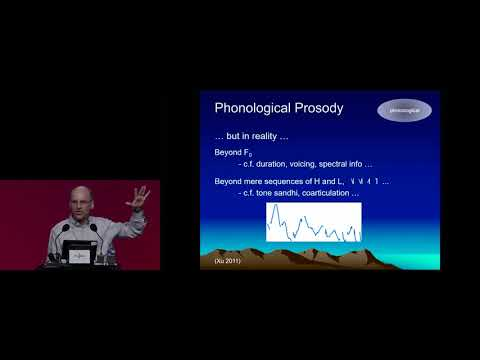

In [8]:
display_yotube_video("https://www.youtube.com/watch?v=uyW0pOAKRME", width=800, height=600)

### Prosody Encoding. 

Given a spectorgam of a reference prosody, we want to extract prosodic information from a reference spectrogram but remove information about
- lingustic content;
- speaker;
- room characteristics;
- ignore noise or other background sounds;


Gooo baseline of prosody encoder is a convolution encoder which acts on spectrograms and outputs prosody embeddings. $ Prosody=Enc({Spectro}) $

<img src="assets/enc_text_speaker_prosody.png" style="height: 500px"/>

### StyleTokens

- Compute linear combination of learnable style vectors  with outputs of reference encoder and treat this as a stile embedding.
- Style vectors are learned in unsupervised way, via $ \large {\frac{\partial{L}}{\partial{t_n}}, n \in \{0 ... N\}}$
- This approch makes possible to specify desired weight for each of the learned style tokens.

<img src="assets/style_tokens.png" />

In [9]:
import torch.nn as nn
class StyleTokenLayer(nn.Module):

    def __init__(self, n_tokens=10, emb_dim=512):
        super(StyleTokenLayer, self).__init__()

        self.tokens = nn.Parameter(torch.rand(emb_dim,  n_tokens))
        nn.init.xavier_uniform_(self.tokens.data, gain=nn.init.calculate_gain('linear'))

    def forward(self, x):
        """

        Parameters
        ----------
        x: torch.Tensor of shape (n_batch, n_hidden)

        Returns
        -------

        """
        # style dot-product attention.
        input_norms = torch.norm (x, dim=1, keepdim=True)
        token_norms = torch.norm (self.tokens, dim=0, keepdim=True)
        token_weights = F.softmax((x @ self.tokens) / input_norms / token_norms / 0.2, dim=-1)
        return token_weights @ self.tokens.t()

    def inference_with_softmax_temperature(self, x, T=1.0):
        # style dot-product attention.
        input_norms = torch.norm (x, dim=1, keepdim=True)
        token_norms = torch.norm (self.tokens, dim=0, keepdim=True)
        token_weights = F.softmax((x @ self.tokens) / input_norms / token_norms / T, dim=-1)
        return token_weights @ self.tokens.t()

    def inference_conditioned_on_style(self, token_weights):
        return token_weights @ self.tokens.t()

### SpeechSplit

Ellegant idea on how to dissentangle Content, Rhythm, Timber and Pitch. Using informatioinal bottlenecks and RandomResampling operations, which by itself is a data augmentation! [SpeechSplit Demo](https://auspicious3000.github.io/SpeechSplit-Demo/)


<img src="assets/speechflow.png" alt="speechflow" style="height: 400px"/>

# Zero speech chanllange

https://zerospeech.com/

- also known as TTS without Text
- goal is to learn model which is able to speak in unknown language with data available only for infant
- pushes the boundaries of representation learning approaches
- important for low resource languages

## Applications: 
- keyword search;
- document classification;
- image retrieval from speech;
- speech to speech translation;

<img src="assets/zero-speech.png" style="height: 500px">


# Open questions in TTS modelling.
1. How can we reduce the amount of training data necessary for training TTS models?
2. Training on data from real life, with bacgkround noises, low quality audio.
3. Effective dissentangling of audio data into set of independent features.
4. learning better universal graphical representaiton then text or phonemes.